# <font color=darkcyan>  Introduction and application to dimension reduction in Python </font>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Sample multivariate normal with ``np.random.multivariate_normal``

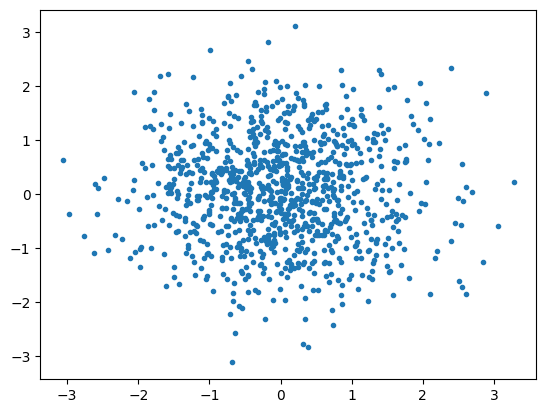

In [31]:
m = [0, 0]
Sigma = [[1, 0], [0, 1]]
n = 1000
# Sample n Gaussian random variables with mean m and variance matrix Sigma 
x, y = np.random.multivariate_normal(m, Sigma, n).T
plt.plot(x, y, '.')
plt.show()

### <font color=red>  Singular Value Decomposition </font>

The Singular Value Decomposition (SVD) states that for all $\mathbb{R}^{n \times d}$ matrix $A$ with rank $r$, there exist $\sigma_1\geqslant \ldots \geqslant \sigma_r>0$ such that
$$
A = \sum_{k=1}^r \sigma_k u_k v_k'\,,
$$
where $\{u_1,\ldots,u_r\}\in (\mathbb{R}^n)^r$ and $\{v_1,\ldots,v_r\}\in (\mathbb{R}^d)^r$ are two orthonormal families. The vectors $\{\sigma_1,\ldots,\sigma_r\}$ are called singular values of $A$ and $\{u_1,\ldots,u_r\}$ (resp. $\{v_1,\ldots,v_r\}$) are the left-singular (resp. right-singular) vectors of $A$.


1. If $U$ denotes the $\mathbb{R}^{n\times r}$ matrix with columns given by $\{u_1,\ldots,u_r\}$ and $V$ denotes the $\mathbb{R}^{p \times r}$ matrix with columns given by $\{v_1,\ldots,v_r\}$, then the singular value decomposition of $A$ may also be written as
$$
A = UD_rV'\,,
$$
where $D_r = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$.


2. The singular value decomposition is closely related to the spectral theorem for symmetric semipositive definite matrices. In the framework of this practical session, $A'A$ and $AA'$ are positive semidefinite such that
$$
A'A = VD_r^2V'\quad\mathrm{and}\quad AA' = UD_r^2U'\,.
$$

The numpy.linalg.svd function can be used in Python to compute the SVD of a given matrix. The output of this function are:
1. $U$ has left singular vectors in the columns ;
2. sigma is rank 1 numpy array with singular values ;
3. $V$ has right singular vectors in the rows.

In [32]:
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')

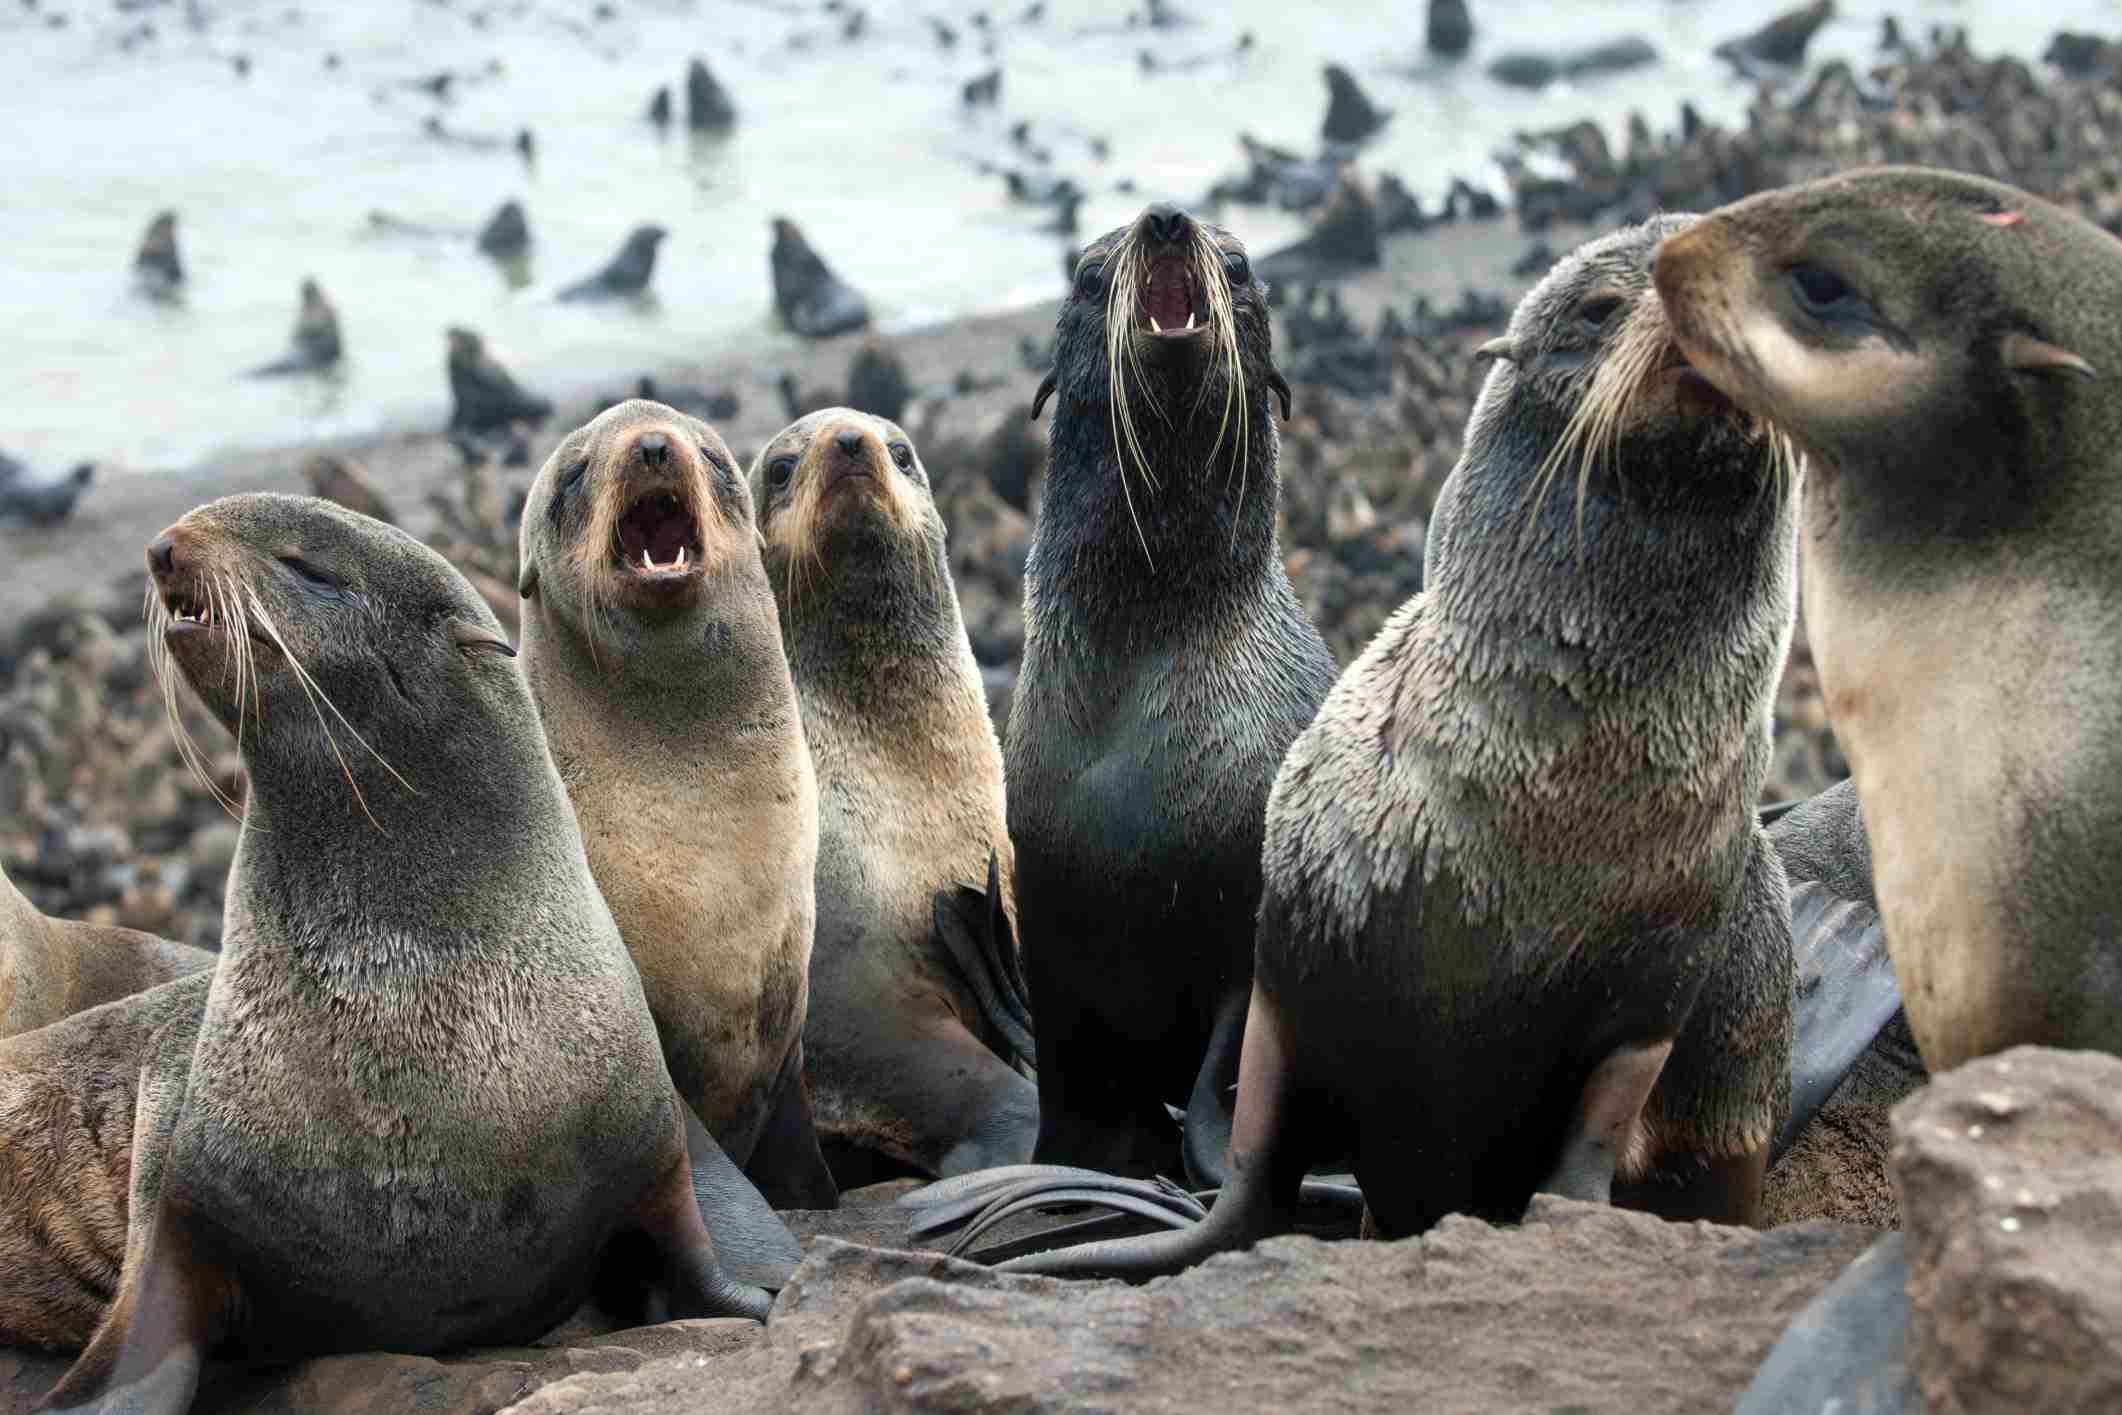

In [33]:
from PIL import Image
# Image.open is used to open the input picture (with any .jpg or .png)
img = Image.open('./seals.jpg')
img

In [34]:
# Image converted into a numpy array or matrix
img_mat       = np.array(list(img.getdata(band=0)), float)
img_mat.shape = (img.size[1], img.size[0])
img_mat       = np.matrix(img_mat)
# SVD can then be applied to the matrix img_mat
img_mat

matrix([[211., 211., 211., ..., 216., 216., 216.],
        [211., 211., 211., ..., 215., 216., 216.],
        [211., 211., 211., ..., 214., 216., 216.],
        ...,
        [ 90.,  91.,  92., ...,  90.,  86.,  86.],
        [ 95.,  96.,  96., ...,  90.,  88.,  88.],
        [104., 104., 103., ...,  90.,  89.,  89.]])

https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [35]:
# Perform Singular Value Decomposition
U, sigma, V = np.linalg.svd(img_mat)
print('Size left singular eigenvectors  ' + str(np.shape(U)))
print('Size right singular eigenvectors  ' + str(np.shape(V)))
print('Size eigenvalues matrix ' + str(np.shape(sigma)))

Size left singular eigenvectors  (1415, 1415)
Size right singular eigenvectors  (2122, 2122)
Size eigenvalues matrix (1415,)


Image information: 37.94857932063902 %


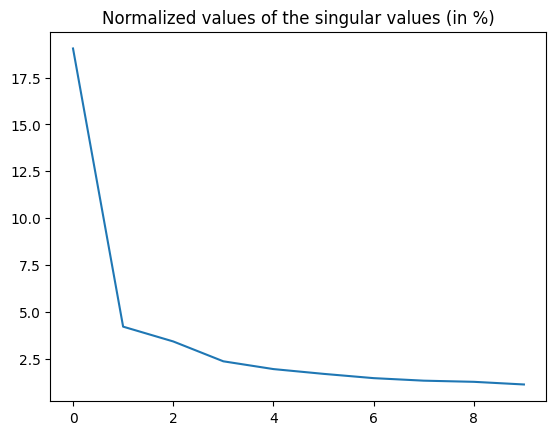

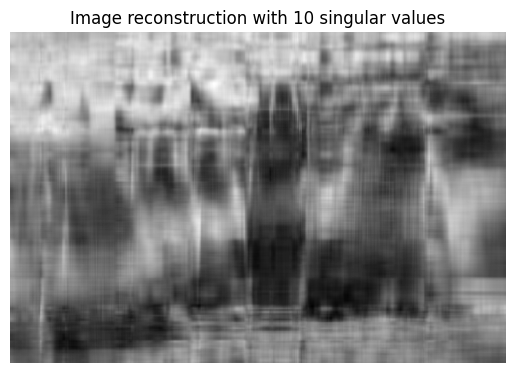

In [36]:
# Image reconstruction
k = 10

reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    
fig = plt.figure(1)
plt.plot(sigma[0:k]*100/np.sum(sigma))
plt.title("Normalized values of the singular values (in %)")
fig = plt.figure(2)
plt.title("Image reconstruction with %g singular values"%k)
plt.imshow(reconstimg, cmap='gray')
plt.axis('off')
print("Image information:",np.sum(sigma[0:k]*100/np.sum(sigma)),"%")

In [37]:
def svd_decomposition(path_image,k):
    img           = Image.open(path_image)
    img_mat       = np.array(list(img.getdata(band=0)), float)
    img_mat.shape = (img.size[1], img.size[0])
    img_mat       = np.matrix(img_mat)
    
    # Perform Singular Value Decomposition
    U, sigma, V = np.linalg.svd(img_mat)
    print('Size left singular eigenvectors  ' + str(np.shape(U)))
    print('Size right singular eigenvectors  ' + str(np.shape(V)))
    print('Size eigenvalues matrix ' + str(np.shape(sigma)))
    
    # Image reconstruction
    reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    
    fig = plt.figure(1)
    plt.plot(sigma[0:k]*100/np.sum(sigma))
    plt.title("Normalized values of the singular values (in %)")
    fig = plt.figure(2)
    plt.title("Image reconstruction with %g singular values"%k)
    plt.imshow(reconstimg, cmap='gray')
    plt.axis('off')
    print("Image information:",np.sum(sigma[0:k]*100/np.sum(sigma)),"%")

Size left singular eigenvectors  (1415, 1415)
Size right singular eigenvectors  (2122, 2122)
Size eigenvalues matrix (1415,)
Image information: 58.38105606731331 %


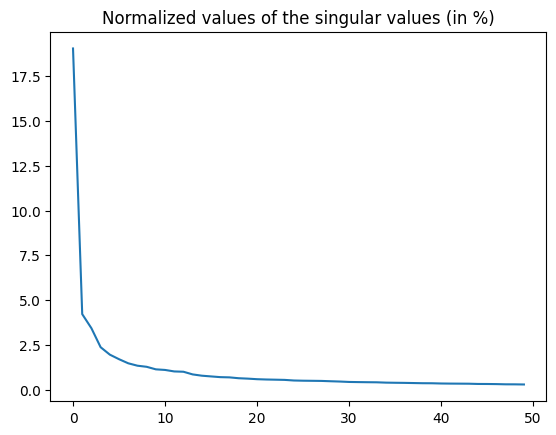

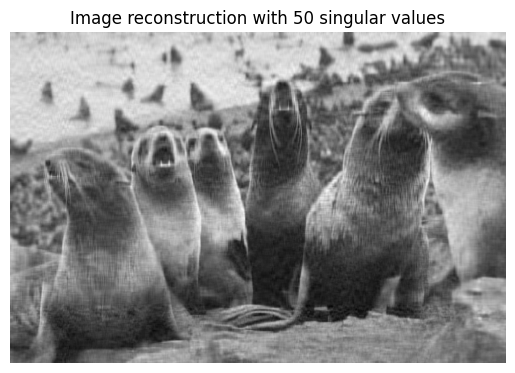

In [38]:
svd_decomposition("./seals.jpg",50)

In [41]:
# Image reconstruction using interact to analyze the influence of the number of singular values
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(svd_decomposition,path_image='./seals.jpg',k=(1,1415))

interactive(children=(Text(value='./seals.jpg', description='path_image'), IntSlider(value=708, description='k…

<function __main__.svd_decomposition(path_image, k)>

### <font color=red>  Principal Component Analysis </font>

#### <font color=red>Application of the SVD to Principal Component Analysis</font>

Let $(X_i)_{1\leqslant i\leqslant n}$ be i.i.d. random variables in $\mathbb{R}^d$ and consider the matrix $X\in\mathbb{R}^{n\times d}$ such that the $i$-th row of $X$ is the observation $X'_i$. Let $\Sigma_n$ be the empirical covariance matrix (data are assumed to be centered for simplicity, this can be done manually):
$$
\Sigma_n = n^{-1}\sum_{i=1}^n X_i X'_i\,.
$$
Principal Component Analysis  aims at reducing the dimensionality of the observations $(X_i)_{1\leqslant i \leqslant n}$ using a "compression" matrix $W\in \mathbb{R}^{p\times d}$ with $p\leqslant d$ so that for each $1\leqslant i \leqslant n$, $WX_i$ ia a low dimensional representation of $X_i$. The original observation may then be partially recovered using another matrix $U\in \mathbb{R}^{d\times p}$. Principal Component Analysis computes $U$ and $W$ using the least squares approach:
$$
(U_{\star},W_{\star}) \in \hspace{-0.5cm}\underset{(U,W)\in \mathbb{R}^{d\times p}\times \mathbb{R}^{p\times d}}{\mathrm{argmin}} \;\sum_{i=1}^n\|X_i - UWX_i\|^2\,, 
$$

Let $(U_{\star},W_{\star})\in \mathbb{R}^{d\times p}\times \mathbb{R}^{p\times d}$ be a solution to this problem. Then, it can be proved that the columns of $U_{\star}$ are orthonormal and $W_{\star} = U_{\star}'$. Therefore, solving the optimization problem boils down to computing
$$
U_{\star} \in \hspace{-0.5cm}\underset{U\in \mathbb{R}^{d\times p}\,,\, U'U = I_n}{\mathrm{argmax}} \hspace{-.4cm}\{ \mathrm{trace}(U'\Sigma_nU)\}\,.
$$
Let $\{\vartheta_1,\ldots,\vartheta_d\}$ be orthonormal eigenvectors associated with the eigenvalues $\lambda_1\geqslant \ldots \geqslant \lambda_d$ of $\Sigma_n$. Then a solution is given by the matrix $U_{\star}$ with columns $\{\vartheta_1,\ldots,\vartheta_p\}$ and $W_{\star} = U_{\star}'$.

#### <font color=red>Principal Component Analysis as an optimization problem</font>

For any dimension $1\leqslant p \leqslant  d$, let $\mathcal{F}_d^p$ be the set of all vector suspaces of $\mathbb{R}^d$ with dimension $p$. Principal Component Analysis computes a linear span $V_d$ such as
$$
V_p \in \underset{V\in \mathcal{F}_d^p}{\mathrm{argmin}} \;\sum_{i=1}^n\|X_i - \pi_V(X_i)\|^2\,, 
$$
where $\pi_V$ is the orthogonal projection onto the linear span $V$. Consequently, $V_1$ is a solution if and only if $v_1$ is solution to:
$$
v_1 \in \underset{v \in \mathbb{R}^d\,;\, \|v\|=1}{\mathrm{argmax}} \sum_{i=1}^n   \langle X_i, v \rangle^2\,.
$$
For all $2\leqslant p \leqslant d$, following the same steps, it can be proved that  a solution is given by $V_p = \mathrm{span}\{v_1, \ldots, v_p\}$ where
$$
v_1 \in \underset{v\in \mathbb{R}^d\,;\,\|v\|=1}{\mathrm{argmax}} \sum_{i=1}^n\langle X_i,v\rangle^2 \quad\mbox{and for all}\;\; 2\leqslant k \leqslant p\;,\;\; v_k \in \underset{\substack{v\in \mathbb{R}^d\,;\,\|v\|=1\,;\\ v\perp v_1,\ldots,v\perp v_{k-1}}}{\mathrm{argmax}}\sum_{i=1}^n\langle X_i,v\rangle^2\,. 
$$

As $V_p = \mathrm{span}\{\vartheta_1, \ldots, \vartheta_p\}$, for all $1\leqslant i\leqslant n$,
$$
\pi_{V_p}(X_i) = \sum_{k=1}^p \langle X_i,\vartheta_k\rangle \vartheta_k  = \sum_{k=1}^p (X'_i \vartheta_k)\vartheta_k = \sum_{k=1}^p c_k(i)\vartheta_k\,,
$$
where for all $1\leqslant k \leqslant p$, the $k$-th principal component is defined as $c_k = X\vartheta_k$. Therefore the $k$-th principal component is the vector whose components are the coordinates of each $X_i$, $1\leqslant i\leqslant n$, relative to the basis $\{\vartheta_1, \ldots, \vartheta_p\}$ of $V_p$.

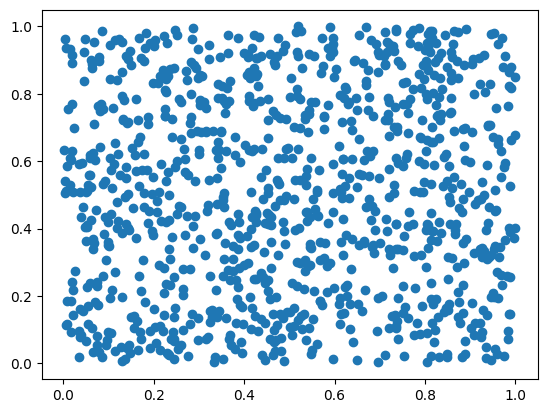

In [43]:
x_values = np.random.rand(n)
y_values = np.random.rand(n)
plt.scatter(x_values,y_values)

In [46]:
X = np.dot(np.random.normal(0,1,[2,2]), np.random.normal(0,1,[2,200])).T
print(X[:15])

[[-0.21526826 -0.52227997]
 [-0.54633248 -0.13191029]
 [-1.35682658 -0.36929075]
 [-0.11952268 -1.061186  ]
 [ 0.46626677  0.04592637]
 [ 0.99373084  0.25997821]
 [ 0.9455317   1.54948173]
 [-0.28027416 -0.20355255]
 [-0.96834611 -0.28259224]
 [ 1.37253593  0.2129703 ]
 [-0.80326896 -0.11110419]
 [-1.70182964 -0.17937805]
 [ 1.73932612  0.18570817]
 [-0.82755589 -0.34400953]
 [-0.38261564  0.44854924]]


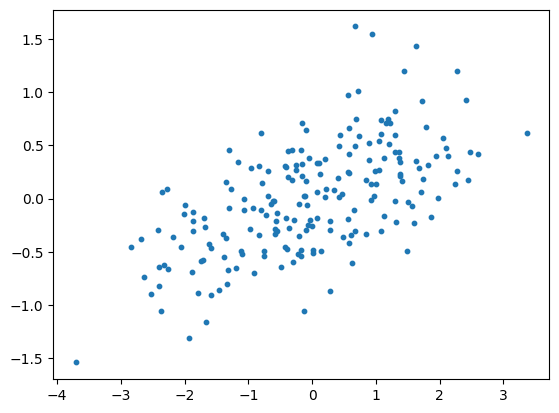

In [47]:
plt.scatter(X[:, 0], X[:, 1], s = 10)

In [48]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

We can display several outputs of the PCA 

In [49]:
print('The principal component is:')
print(pca.components_)

print('The explained variance is %g'%pca.explained_variance_)
print('The associated singular value is %g'%pca.singular_values_)

The principal component is:
[[-0.96685387 -0.25533038]]
The explained variance is 1.86074
The associated singular value is 19.2428


In [52]:
# Apply the dimensionality reduction on X
# X_pca contains the coordinates of each data in the space generated by the principal components

X_pca = pca.transform(X)

# in this case pca.components_[k] contains the coordinates of the k-th principal component in
# the original space (here the usual Euclidian plane). In a general case pca.components_[k] is a 
# d-dimensional vector.
# X_pca[i] contains the coordinates of the i-th data in the vector space generated by the principal 
# components.
# Therefore, X_pca[i] is a vector with n_components entries. 

In a general case, when $\mathrm{n\_components} = p$ for all $1\leqslant i\leqslant n$ and all $1\leqslant k \leqslant p$, the
projection of $X_i$ in the space generated by the principal components is:

$$
\pi_{V_p}(X_i) = \sum_{k=1}^{p}X_{\mathrm{pca}}[i]_k \times \mathrm{pca.components\_}[k]\,.
$$

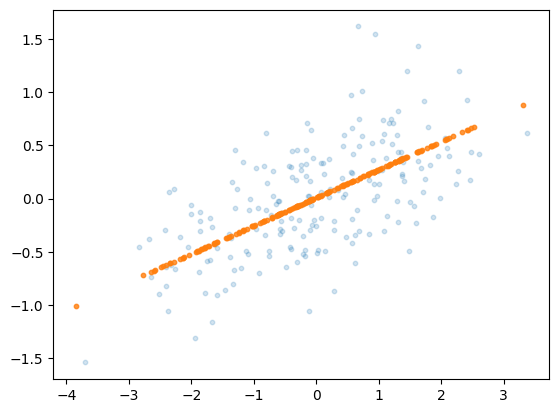

In [53]:
# transform the reduced data set in the original space
# X_inverse[i,:] contains the coordinates of the projection of Xi in the original space

X_inverse = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, s=10)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], alpha=0.8, s=10)